<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/cuaderno%203/Rectificador_onda_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

Modelo Laplace Circuito RC serie
Cálculo función de transferencia

In [ ]:
#usando sympy
s = sym.symbols('s', complex=True) #definir variable compleja s
t, R, L, C = sym.symbols('t R L C', positive = True) #defini variables de la función como positivos
Vin = sym.Function('Vin')(s) #definir variable x que depende de s


Vc = 1/(R*C*s + 1) * Vin #voltaje capacitor = voltaje de salida
Vc


Vin(s)/(C*R*s + 1)

In [ ]:
#valores de resistencia y capacitancia
Rv = int(input("Ingrese un valor de resistencia en ohms: "))
Cv = float(input("Ingrese un valor de capacitancia en faradios: "))
print("\n")
VcRC = Vc.subs(R, Rv).subs(C, Cv) #sustituir los valores en la fórmula de sympy
VcRC

Ingrese un valor de resistencia en ohms: 1000
Ingrese un valor de capacitancia en faradios: 0.00001




Vin(s)/(0.01*s + 1)

In [ ]:
#función de transfeencia con scipy (ya hay una función que hace esa vaina)
num = np.array([1])
den = np.array([Rv*Cv,1]) #el numerador y el denominador de la función de transfeencia deben ser array para que funcione con scipy
Gn = sig.TransferFunction(num,den) #funciona como una clase
print(num)
print(den)



[1]
[0.01 1.  ]


Evaluar el sistema ante una entrada y salida en array

In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 periodos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_ = A*(np.sin(2*np.pi*Fo*t)) #señal de entrada
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
in_r = in_ * rec_c #para rectificar la señal de entrada
out = Gn.output(in_r, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

Text(0, 0.5, 'Amplitud')

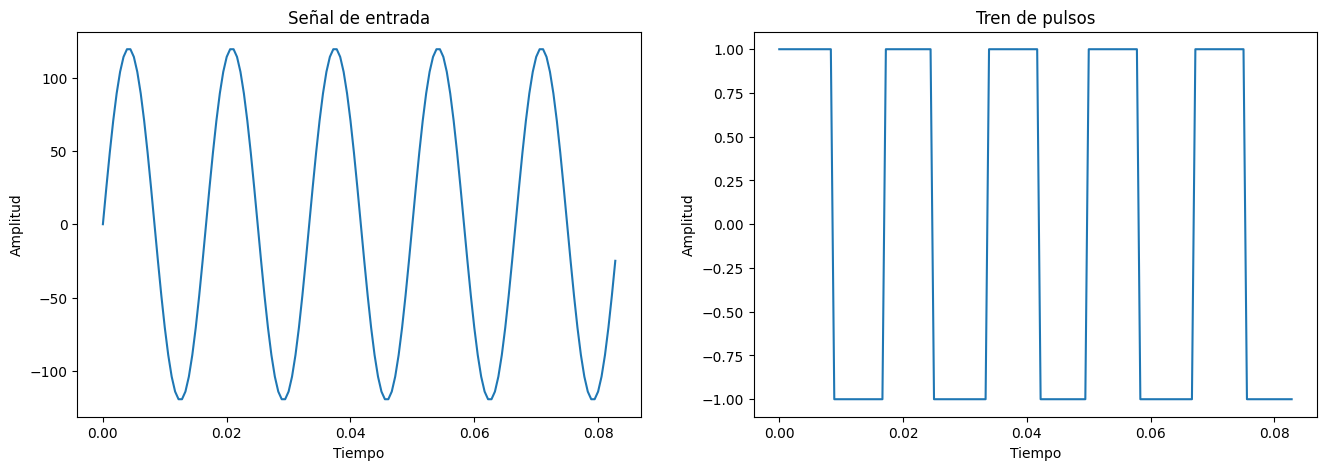

In [ ]:
#gráficas

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(t,in_)
plt.title("Señal de entrada")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.plot(t, rec_c)
plt.title("Tren de pulsos")
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

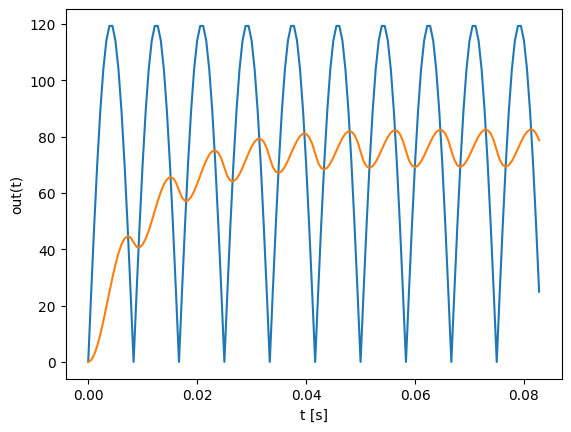

In [ ]:
plt.plot(t, in_r,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

Espectro con FFT

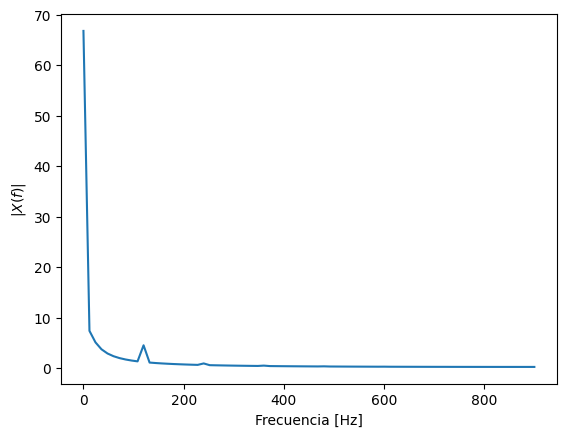

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

Cálculo de la distorsión total de armónicosn

In [ ]:
import scipy.signal as sig

# Calcular el THD
fundamental_freq = 60  # Frecuencia fundamental en Hz
fundamental_idx = np.argmin(np.abs(vfre - fundamental_freq))
fundamental_amplitude = np.abs(Xf[fundamental_idx])

harmonics_amplitudes = np.abs(Xf)
harmonics_amplitudes[fundamental_idx] = 0  # Elimina la componente fundamental

thd = np.sqrt(np.sum(harmonics_amplitudes**2) / fundamental_amplitude**2)

print(f"Total Harmonic Distortion (THD): {thd:.2f}")

# Calcular la distorsión del factor de potencia
real_power = np.mean(out**2)
apparent_power = np.mean(np.abs(out)**2)

pf_distortion = np.sqrt((apparent_power - real_power) / apparent_power)

print(f"Distorsión del Factor de Potencia: {pf_distortion:.2f}")


Total Harmonic Distortion (THD): 28.53
Distorsión del Factor de Potencia: 0.00
